<a href="https://colab.research.google.com/github/ElipLam/Predicting-the-P-glycoprotein-inhibitor/blob/main/Predicting_the_P_glycoprotein_Inhibitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [1]:
!pip install progress

  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9632 sha256=1aacafcb0b0de11514dae7fb983368d0a8b8137cf7592ce30a2e445d86787e62
  Stored in directory: /root/.cache/pip/wheels/8e/d7/61/498d8e27dc11e9805b01eb3539e2ee344436fc226daeb5fe87
Successfully built progress


In [2]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 1.4 MB/s 


In [3]:
!pip install padelpy

     |████████████████████████████████| 20.9 MB 2.6 MB/s 


In [4]:
# !pip install tflearn

# Git clone

In [5]:
!git clone https://github.com/ElipLam/Predicting-the-P-glycoprotein-inhibitor.git

Cloning into 'Predicting-the-P-glycoprotein-inhibitor'...
remote: Enumerating objects: 3008, done.
remote: Counting objects: 100% (3008/3008), done.
remote: Compressing objects: 100% (2961/2961), done.
remote: Total 3008 (delta 84), reused 2970 (delta 46), pack-reused 0
Receiving objects: 100% (3008/3008), 38.69 MiB | 26.92 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [6]:
!pip install -r /content/Predicting-the-P-glycoprotein-inhibitor/bin/requirements.txt

     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 97 kB 4.5 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 899 kB 50.3 MB/s 
     |████████████████████████████████| 156 kB 50.1 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 4.1 MB 29.5 MB/s 
     |████████████████████████████████| 61 kB 6.6 MB/s 
     |████████████████████████████████| 199 kB 48.6 MB/s 
     |████████████████████████████████| 1.1 MB 27.1 MB/s 
     |████████████████████████████████| 11.2 MB 35.1 MB/s 
ERROR: Could not find a version that satisfies the requirement numpy==1.22.3 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 

In [7]:
!pip install pyzipper

     |████████████████████████████████| 162 kB 5.3 MB/s 
     |████████████████████████████████| 2.0 MB 48.8 MB/s 


#Preprocessing

In [8]:
!python /content/Predicting-the-P-glycoprotein-inhibitor/bin/check_device.py

2022-04-19 09:35:38.342035: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9265725200830485172
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1244904046305574095
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]
Great! Graphviz already exists.


In [9]:
from rdkit.Chem import PandasTools, MolToSmiles, MolFromSmiles
from rdkit.Chem import AllChem, Draw
from padelpy import from_sdf, from_smiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import load_model
from tensorflow.keras import Sequential
import tensorflow.keras.layers as layers
from keras.models import Sequential, Model
from tensorflow.keras.applications import  Xception,VGG16,InceptionResNetV2,MobileNetV2

tf.test.gpu_device_name()

'/device:GPU:0'

In [11]:
# !python /content/Predicting-the-P-glycoprotein-inhibitor/bin/data_preprocessing.py

Creating images |████████████████████████████████| 2865/2865
Raw dataset
Number of Activity: 1880
Number of Inactivity: 985
Random Oversampling...
Number of ROS Activity: 1880
Number of ROS Inactivity: 1880


## EDA

In [12]:
df = pd.read_csv('/content/Predicting-the-P-glycoprotein-inhibitor/dataset/raw_P-gp_act_inact_dataset.csv')
raw_smiles = df['Path'].to_list()
raw_labels = df['Activity'].to_list()

In [13]:
df['Activity'].value_counts()

1    1880
0     985
Name: Activity, dtype: int64

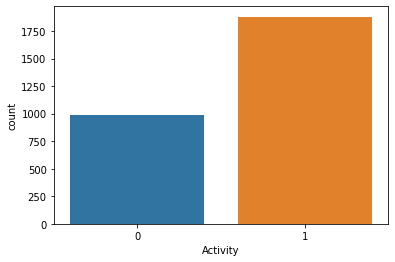

In [14]:
sns.countplot(x='Activity', data=df)

In [15]:
# Random Oversampling
ros_df = pd.read_csv('/content/Predicting-the-P-glycoprotein-inhibitor/dataset/P-gp_act_inact_dataset.csv')
ros_smiles = df['Path'].to_list()
ros_labels = df['Activity'].to_list()

In [16]:
ros_df['Activity'].value_counts()

1    1880
0    1880
Name: Activity, dtype: int64

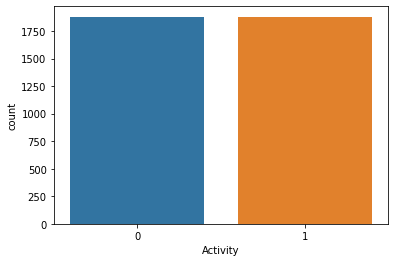

In [17]:
sns.countplot(x='Activity', data=ros_df)

In [18]:
print(df.groupby(df.columns.tolist(),as_index=False).size())

              Name                                              Smile  \
0        CHEMBL103  CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...   
1        CHEMBL104             Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1   
2     CHEMBL105310                     O=C(/C=C/c1ccccc1)c1ccc(O)cc1O   
3       CHEMBL1064  CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...   
4        CHEMBL107  COc1cc2c(c(OC)c1OC)-c1ccc(OC)c(=O)cc1[C@@H](NC...   
...            ...                                                ...   
2850      ECKER995  O=C(OC1(C)C(OC(=O)c2ccccc2)C2C(O)(C(OC(=O)C)C(...   
2851      ECKER996  O=C(OC12C(=O)C(C)/C=C/C(C)(C)C(OC(=O)c3cnccc3)...   
2852      ECKER997  O=C(OC1(C(=O)C)C2(C)C(C3C(C4(C)C(C(C)C3)=CC(=O...   
2853      ECKER998  O=C(OC1(C(=O)C)C2(C)C(C3C=C(C)C=4C(C)(C3CC2)CC...   
2854      ECKER999  O=C(OC1(C)C(OC(=O)C)C2C(OC(=O)C)(C(=O)C(C)/C=C...   

      Activity                                               Path  size  
0            0  /content/Predicting-the-P-glycopr

# Train

In [19]:
!python /content/Predicting-the-P-glycoprotein-inhibitor/bin/train.py --epos 2 --model simple

2022-04-19 09:37:01.230532: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
P-gp_act_inact_dataset.csv already exists!
Loading dataset...
Done!
Model: "simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 7

# Predict

In [20]:
!python /content/Predicting-the-P-glycoprotein-inhibitor/bin/predict.py

2022-04-19 09:38:36.159559: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Model: "simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 75, 75, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                          

# Visualize Feature Maps

Images in output/images

In [ ]:
# !python /content/Predicting-the-P-glycoprotein-inhibitor/bin/visualize_feature_maps.py

3 conv2d (3, 3, 1, 32)
8 conv2d_1 (3, 3, 32, 64)
11 conv2d_2 (3, 3, 64, 64)
16 conv2d_3 (3, 3, 64, 128)
19 conv2d_4 (3, 3, 128, 128)
24 conv2d_5 (3, 3, 128, 64)
27 conv2d_6 (3, 3, 64, 64)
32 conv2d_7 (3, 3, 64, 32)
35 conv2d_8 (3, 3, 32, 32)
BLOCK_8 64 filters, creating image...
BLOCK_11 64 filters, creating image...
BLOCK_16 128 filters, creating image...
BLOCK_19 128 filters, creating image...
BLOCK_27 64 filters, creating image...


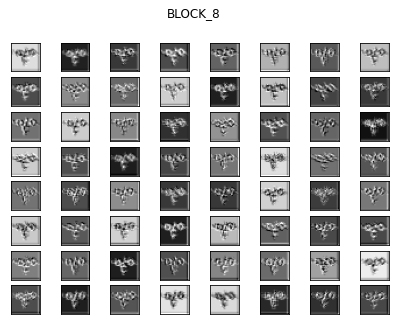

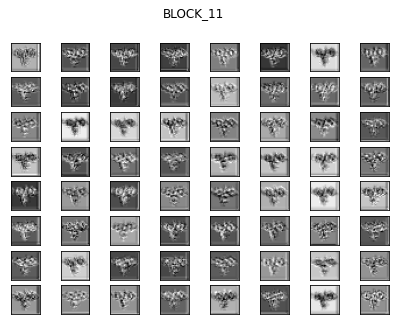

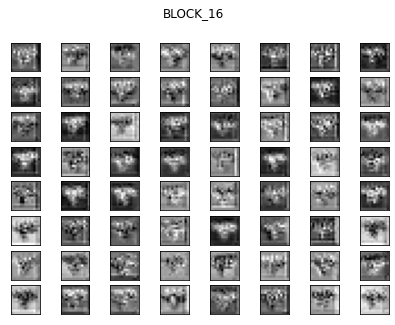

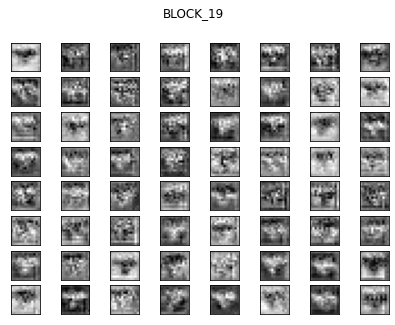

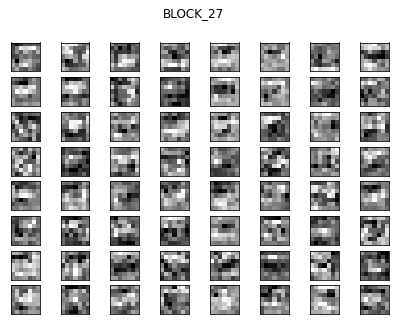

In [22]:
from pathlib import Path
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_input(img_path, target_size, channels):
    raw = tf.io.read_file(img_path)
    image = tf.image.decode_png(raw, channels=channels)
    image = tf.image.resize(image, target_size)
    return image

ROOT = '/content/Predicting-the-P-glycoprotein-inhibitor'
OUTPUT_PATH = Path(ROOT, 'output')
DATASET_PATH = Path(ROOT, 'dataset')
IMAGES_PATH = Path(DATASET_PATH, 'images')
model_path = Path(OUTPUT_PATH, 'best_model.h5')


model = keras.models.load_model(model_path)

for i, layer in enumerate(model.layers):
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(i, layer.name, filters.shape)
    # print(bias)

# redifine model to output right after the first hidden layers
blocks = [8, 11, 16, 19, 27]
outputs = [model.layers[i].output for i in blocks]
sub_model = keras.models.Model(
    inputs=model.inputs, outputs=outputs)
# sub_model.summary()

# load image with the required shape
img = preprocess_input(
    str(Path(IMAGES_PATH, 'CHEMBL6.png')), target_size=(224, 224), channels=1)

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare th image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
feature_maps = sub_model.predict(img)
# plot all 64 maps in an 8x8 squares
h_fig = 8
w_fig = 8
for i, fmap in zip(blocks, feature_maps):
    ix = 1
    fig = plt.figure(figsize=(7, 5))
    block_name = 'BLOCK_{}'.format(i)
    fig.suptitle(block_name)
    # specify subplot and return of axis
    print(block_name, fmap.shape[3], 'filters, creating image...')
    for j in range(1, (h_fig * w_fig)+1):
        ax = plt.subplot(h_fig, w_fig, j)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot fiter channel in grayscale
        plt.imshow(fmap[0, :, :, j-1], cmap = 'gray')
        # save figure
        plt.savefig('{}.png'.format(
            Path(OUTPUT_PATH, 'images', block_name)))
    # print(fmap)
    ix += 1
plt.show()
